In [1]:
import numpy as np
import os
import random
import tensorflow as tf

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow import keras
from utils import *

%matplotlib inline

2023-07-17 14:47:51.031500: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-17 14:47:56.026073: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
os.environ["PYTHONHASHSEED"] = "0"
random.seed(1234)
np.random.seed(1234)
tf.random.set_seed(1234)

In [3]:
folder_path = './dataset1_3objects'

x, y = read_dataset1(folder_path)

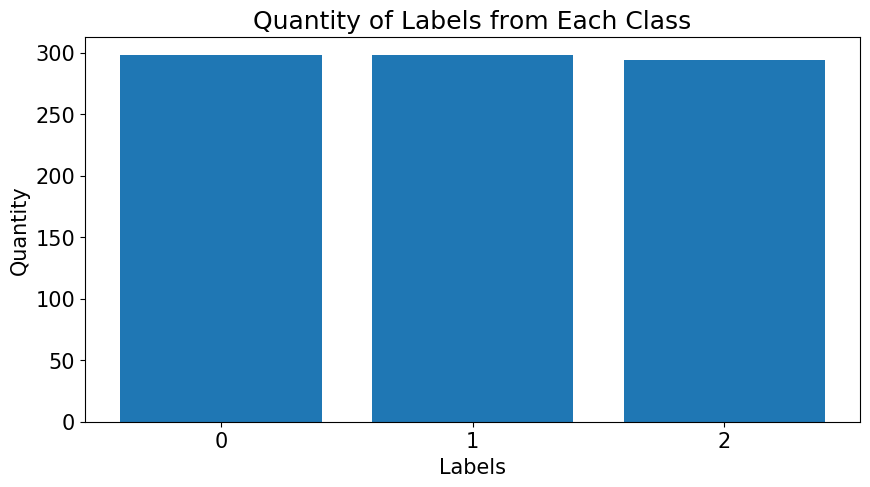

[0 1 2]
3


In [4]:
draw_bar_chart(y)

print(np.unique(y))

n_classes = len(np.unique(y))

print(n_classes)

In [5]:
# shuffle
x, y = shuffle(x, y, random_state=0)

# split
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=1/5, random_state=0, stratify=y)

x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=1/4, random_state=0, stratify=y_temp)

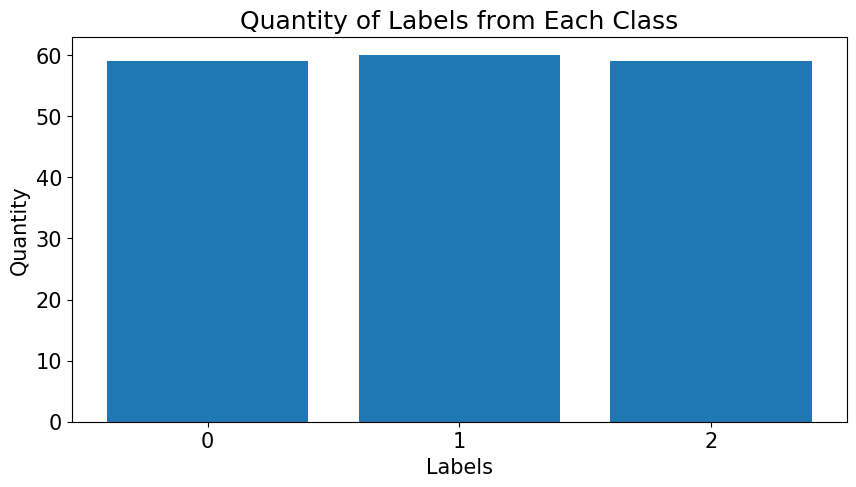

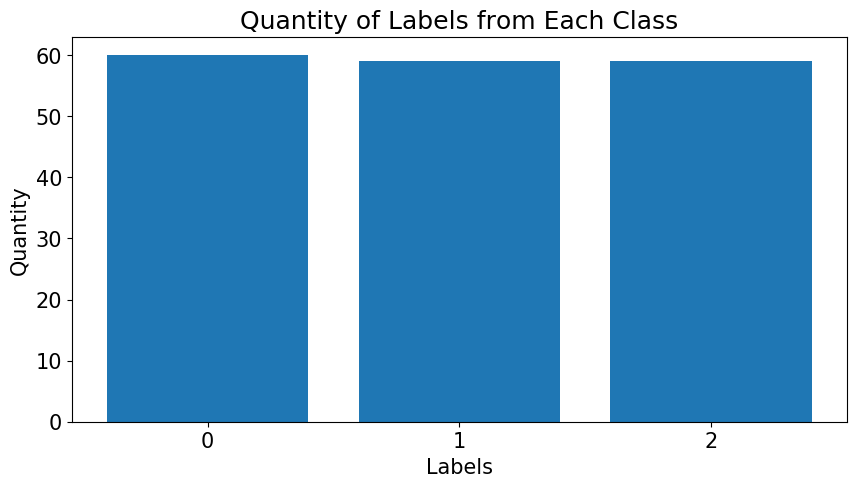

In [6]:
draw_bar_chart(y_val)
draw_bar_chart(y_test)

In [7]:
def create_model(input_shape, dropout=0.2):
   # Create a `Sequential` model and add a Dense layer as the first layer.
   model = tf.keras.models.Sequential()
   model.add(tf.keras.Input(shape=input_shape))
   model.add(tf.keras.layers.Conv1D(32, 2, activation='relu'))
   model.add(tf.keras.layers.MaxPooling1D(2,1))
   model.add(tf.keras.layers.Flatten())
   model.add(tf.keras.layers.Dropout(dropout))
   model.add(tf.keras.layers.Dense(16, activation='relu'))
   model.add(tf.keras.layers.Dense(n_classes, activation="softmax"))

   model.compile(
      loss="sparse_categorical_crossentropy",
      optimizer=keras.optimizers.Adam(learning_rate=1e-4),
      metrics=["sparse_categorical_accuracy"]
   )
   
   return model

In [8]:
input_shape = x.shape[1:]

model = create_model(input_shape)

model.summary()

callbacks = [
    keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint("./dataset1_cnn_results/cnn_model.h5",
        monitor='val_loss',  # Optional: Monitor a specific metric to save the best weights
        save_weights_only=False,  # Save the entire model
        save_best_only=True,  # Save only the best weights based on the monitored metric
        verbose=1  # Optional: Display messages when saving weights
    )
]

results = model.fit(
    x_train,
    y_train,
    validation_data=(x_val,y_val),
    epochs=10000,
    batch_size=16,
    callbacks=callbacks,
)

l, a = model.evaluate(x_val, y_val, verbose=1)

print(l, a)

L, A = model.evaluate(x_test, y_test, verbose=1)

print(L, A)

2023-07-17 14:48:09.942832: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-17 14:48:10.146956: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-17 14:48:10.147645: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 32)            224       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 608)               0         
                                                                 
 dropout (Dropout)           (None, 608)               0         
                                                                 
 dense (Dense)               (None, 16)                9744      
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                        

2023-07-17 14:48:20.903721: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2023-07-17 14:48:23.248269: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fd29000db50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-17 14:48:23.248402: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 960M, Compute Capability 5.0
2023-07-17 14:48:23.721833: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-17 14:48:25.387260: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


34/34 [==============================] - ETA: 0s - loss: 1.0880 - sparse_categorical_accuracy: 0.3858
Epoch 1: val_loss improved from inf to 1.06357, saving model to ./dataset1_cnn_results/transformer_model
34/34 [==============================] - 10s 17ms/step - loss: 1.0880 - sparse_categorical_accuracy: 0.3858 - val_loss: 1.0636 - val_sparse_categorical_accuracy: 0.5000
Epoch 2/10000
31/34 [==========================>...] - ETA: 0s - loss: 1.0595 - sparse_categorical_accuracy: 0.4375
Epoch 2: val_loss improved from 1.06357 to 1.03434, saving model to ./dataset1_cnn_results/transformer_model
34/34 [==============================] - 0s 6ms/step - loss: 1.0615 - sparse_categorical_accuracy: 0.4307 - val_loss: 1.0343 - val_sparse_categorical_accuracy: 0.5169
Epoch 3/10000
30/34 [=========================>....] - ETA: 0s - loss: 1.0367 - sparse_categorical_accuracy: 0.5000
Epoch 3: val_loss improved from 1.03434 to 1.00859, saving model to ./dataset1_cnn_results/transformer_model
34/34 [

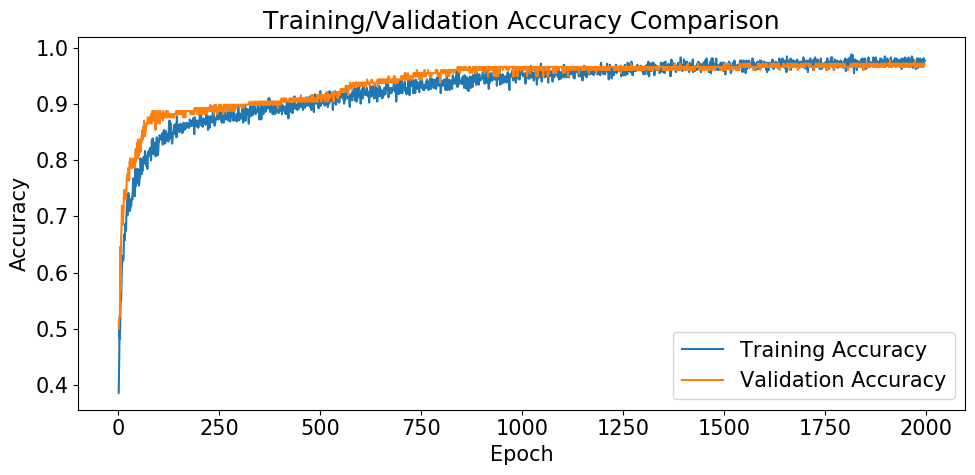

In [9]:
plot_accuracy_comparison([results.history["sparse_categorical_accuracy"], results.history["val_sparse_categorical_accuracy"]],
                        "Training/Validation Accuracy Comparison",
                        ["Training Accuracy", "Validation Accuracy"],
                        save_path = "./dataset1_cnn_results/cnn_dataset1_acc_comparison.svg")

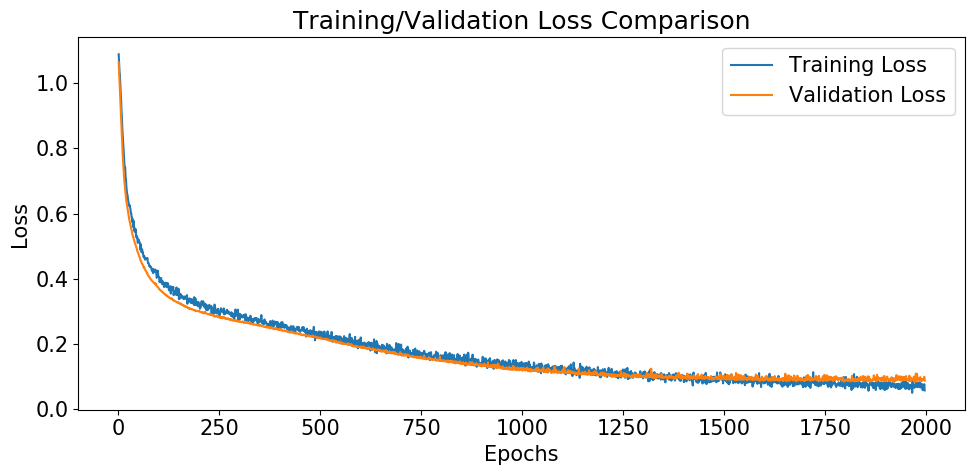

In [10]:
plot_loss_comparison([results.history["loss"], results.history["val_loss"]],
                     "Training/Validation Loss Comparison",
                     ["Training Loss", "Validation Loss"],
                     save_path = "./dataset1_cnn_results/cnn_dataset1_loss_comparison.svg")

6/6 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0     0.9667    1.0000    0.9831        58
           1     1.0000    0.8939    0.9440        66
           2     0.8983    0.9815    0.9381        54

    accuracy                         0.9551       178
   macro avg     0.9550    0.9585    0.9550       178
weighted avg     0.9583    0.9551    0.9549       178



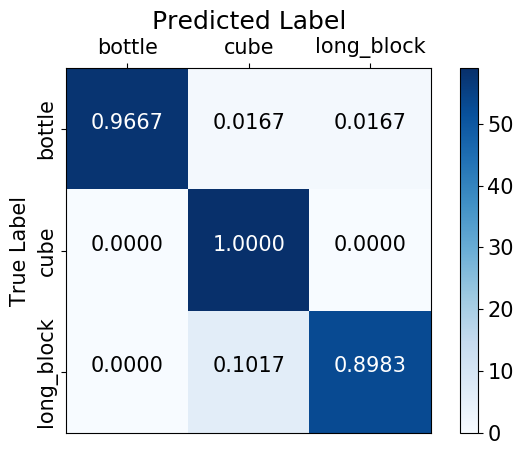

In [11]:
y_pred=np.argmax(model.predict(x_test), axis=-1)
print(classification_report(y_pred,y_test, digits=4))
plot_confusion_matrix(y_test, y_pred, ["bottle", "cube", "long_block"],
                      save_path="./dataset1_cnn_results/cnn_dataset1_conf_matrix.svg")

write_results(results.history['sparse_categorical_accuracy'][-200], a, A,
              results.history['loss'][-200], l, L,
              classification_report(y_pred,y_test, digits=4),
              save_path = "./dataset1_cnn_results/cnn_dataset1_results.txt")